# Test Case Prioritization Data
Test Case Execution History in Continuous Integration

Dataset source - https://www.kaggle.com/datasets/joolousada/test-case-prioritization-data/data

This report investigates the potential of leveraging historical test execution data for enhancing test effectiveness and optimizing test strategies. By analysing historical data, we can gain valuable insights into test performance, identify areas for improvement, and prioritize test execution based on their impact. This approach has the potential to significantly reduce testing time and resources while increasing test coverage and overall software quality. This report outlines the design and exploration of a data-driven approach to test strategy improvement, laying the groundwork for cost-efficient and effective testing practices.

## Data Collection

Data was collected from a continuous integration system that tracks test execution history. The dataset contains information about test cases, their execution status, and the time of execution. The dataset includes the following columns:

- `Id`: Unique test identifier.
- `Name`: Test name encoded.
- `Duration`: Test Duration in seconds.
- `CalcPrio`: Prioritization given to the certain test case in a CI Cycle.
- `LastRun`: Date of last execution.
- `LastResults`: List of previous Execution Outcomes.
- `Verdict`: 1 if Fail, 0 if Pass.
- `Cycle`: In what CI cycle the test case was run.

Fetch the data from the source and load it into a pandas dataframe.
This is structured data, and we can use the pandas library to load the data into a dataframe.

In [67]:
from pathlib import Path
import pandas as pd

raw_data = Path("datasets/") / "raw_dataset.csv"

## ETL

We will perform the following steps in the ETL process:

- Extract: Load the data from the source into a pandas dataframe.
- Transform: Check for missing values and data types, and perform any necessary data cleaning or preprocessing.
- Load: Perform the analysis and visualization of the data to gain insights into the test execution history.

### Data Processing

The data is already in a structured format, so we don't need to perform any data cleaning or preprocessing. We can start by loading the data into a pandas dataframe and then proceed with the analysis.

We need to check for mising values and data types of the columns.

In [68]:
def load_and_transform_data(file_path: Path):
    """Load the dataset from the file path

    param file_path: The path to the dataset
    return: The dataset as a pandas dataframe
    """
    # Load the dataset
    raw_df = pd.read_csv(file_path, delimiter=";")

    # Check for missing values, If there are missing values, we can drop them using the dropna() method
    clean_df = raw_df.dropna()
    nRow, nCol = clean_df.shape
    print(f'There are {nRow} rows and {nCol} columns in the cleaned dataset')
    clean_df.dataframeName = file_path.name

    # Convert the LastRun column to datetime
    clean_df['LastRun'] = pd.to_datetime(clean_df['LastRun'])

    # Convert LastResults column from list of numbers to list of boolean
    clean_df['LastResults'] = clean_df['LastResults'].apply(lambda x: tuple([True if i == 0 else False for i in x]))

    # Convert LastRun column to datetime
    clean_df['LastRun'] = pd.to_datetime(clean_df['LastRun'])

    # Create a new column for LastRunStatus
    clean_df['LastRunStatus'] = clean_df['LastResults'].apply(lambda x: x[-1])

    return clean_df


In [69]:
data_df = load_and_transform_data(raw_data)
data_df

There are 64024 rows and 8 columns in the cleaned dataset


,Id,Name,Duration,CalcPrio,LastRun,LastResults,Verdict,Cycle,LastRunStatus
0,1,1,2.317,0,2020-01-13 00:00:11,"(False, False)",0,1,False
1,400,400,2.533,0,2020-01-13 00:00:11,"(False, False)",0,1,False
2,401,401,4.367,0,2020-01-13 00:00:11,"(False, False)",0,1,False
3,402,402,1.100,0,2020-01-13 00:00:11,"(False, False)",0,1,False
4,403,403,0.500,0,2020-01-13 00:00:11,"(False, False)",0,1,False
...,...,...,...,...,...,...,...,...,...
64019,63622,202,1439.400,0,2020-02-10 20:03:10,"(False, False, False, False, False, False, Fal...",0,106,False
64020,63623,203,1439.617,0,2020-02-10 20:03:10,"(False, False, False, False, False, False, Fal...",1,106,False
64021,63624,204,4.850,0,2020-02-10 20:03:10,"(False, False, False, False, False, False, Fal...",1,106,False
64022,63626,206,3.800,0,2020-02-10 20:03:10,"(False, False, False, False, False, False, Fal...",1,106,False


### Data Analysis

In [70]:
def check_for_missing_values(data_df: pd.DataFrame):
    """Check for missing values in the dataset

    :param data_df: The dataset to check for missing values
    """
    missing_values = data_df.isnull().sum()

    if missing_values.any():
        print("Missing values found in the dataset")
        print(missing_values)
    else:
        print("No missing values found in the dataset")

def check_for_outliers(data_df: pd.DataFrame):
    """Check for outliers in the dataset
    We can check for outliers using the describe() method

    :param data_df: The dataset to check for outliers
    """
    outliers = data_df.describe()
    print("Outliers found in the dataset")
    print(outliers)

In [71]:
check_for_missing_values(data_df)
check_for_outliers(data_df)

No missing values found in the dataset
Outliers found in the dataset
                 Id          Name      Duration  CalcPrio  \
count  64024.000000  64024.000000  64024.000000   64024.0   
mean   32012.500000    302.500000    474.268634       0.0   
min        1.000000      1.000000      0.000000       0.0   
25%    16006.750000    151.750000      1.017000       0.0   
50%    32012.500000    302.500000      3.783000       0.0   
75%    48018.250000    453.250000   1439.050000       0.0   
max    64024.000000    604.000000   1439.983000       0.0   
std    18482.281154    174.360904    673.954581       0.0   

                             LastRun       Verdict         Cycle  
count                          64024  64024.000000  64024.000000  
mean   2020-01-27 07:05:18.858490624      0.213576     53.500000  
min              2020-01-13 00:00:11      0.000000      1.000000  
25%              2020-01-20 12:00:24      0.000000     27.000000  
50%              2020-01-29 10:31:45      0.00

We will start by exploring the data to gain insights into the test execution history. We will look at the distribution of test outcomes, test duration, and test prioritization. We will also analyze the relationship between test duration and test outcomes, and identify any patterns or trends in the data.

## Data Visualization

We will use the matplotlib and seaborn libraries to create visualizations of the data. We will create histograms, scatter plots, and box plots to visualize the distribution of test outcomes, test duration, and test prioritization. We will also create heatmaps and line plots to visualize the relationship between test duration and test outcomes, and identify any patterns or trends in the data.

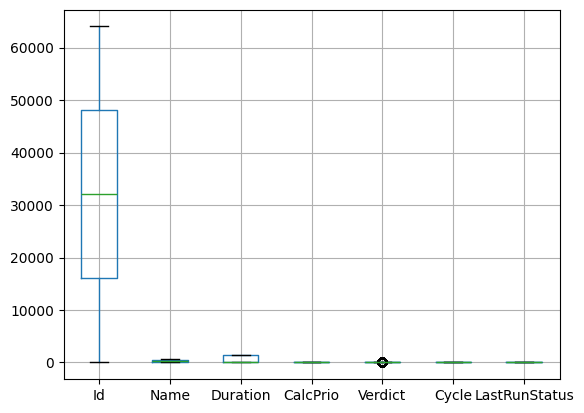

In [72]:
# We can also visualize the outliers using a boxplot
import matplotlib.pyplot as plt
data_df.boxplot()
plt.show()

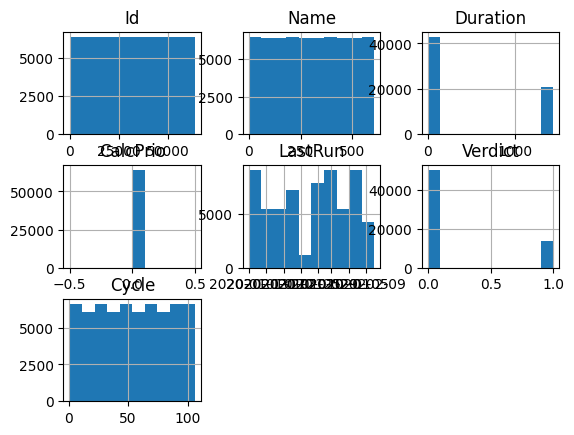

In [73]:
# We can also visualize the outliers using a histogram
data_df.hist()
plt.show()

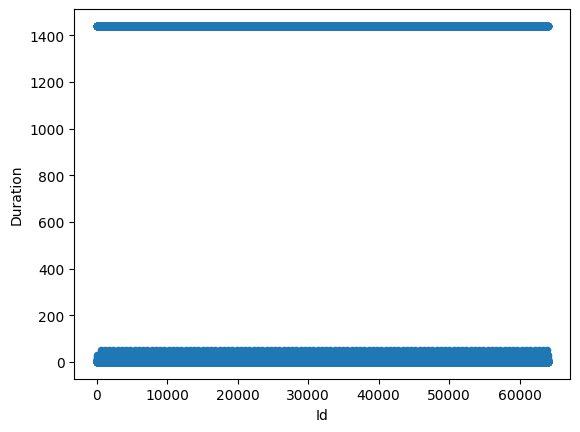

In [74]:
# We can also visualize the outliers using a scatter plot
data_df.plot(kind="scatter", x="Id", y="Duration")
plt.show()

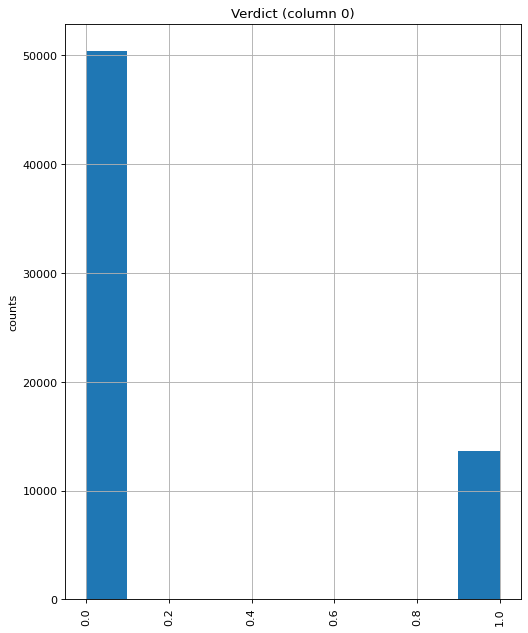

In [75]:
def plot_per_column(data_df: pd.DataFrame, nGraphShown: int, nGraphPerRow: 5):
    """Plot the distribution of each column in the dataset

    :param data_df: The dataset to plot
    :param nGraphShown: The number of graphs to show
    :param nGraphPerRow: The number of graphs to show per row
    """
    unique = data_df.nunique()
    data_df = data_df[[col for col in data_df if unique[col] > 1 and unique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data_df.shape
    columnNames = list(data_df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data_df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plot_per_column(data_df, 10, 5)

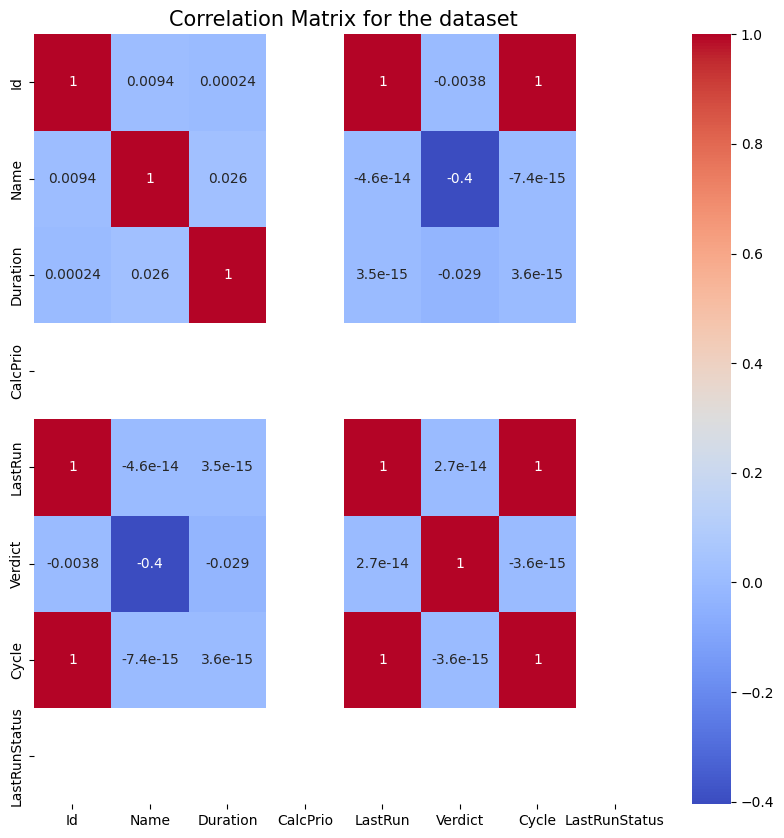

In [76]:
# We can also visualize the correlation between the columns using a heatmap
import seaborn as sns

def plot_correlation(data_df: pd.DataFrame):
    """Plot the correlation between the columns in the dataset

    :param data_df: The dataset to plot
    """
    # Copy the dataframe
    data_df_copy = data_df.copy()

    # Drop the LastResults column
    data_df_copy = data_df_copy.drop(columns=["LastResults"])
    correlation = data_df_copy.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation, annot=True, cmap="coolwarm")
    plt.title('Correlation Matrix for the dataset', fontsize=15)
    plt.show()


plot_correlation(data_df)

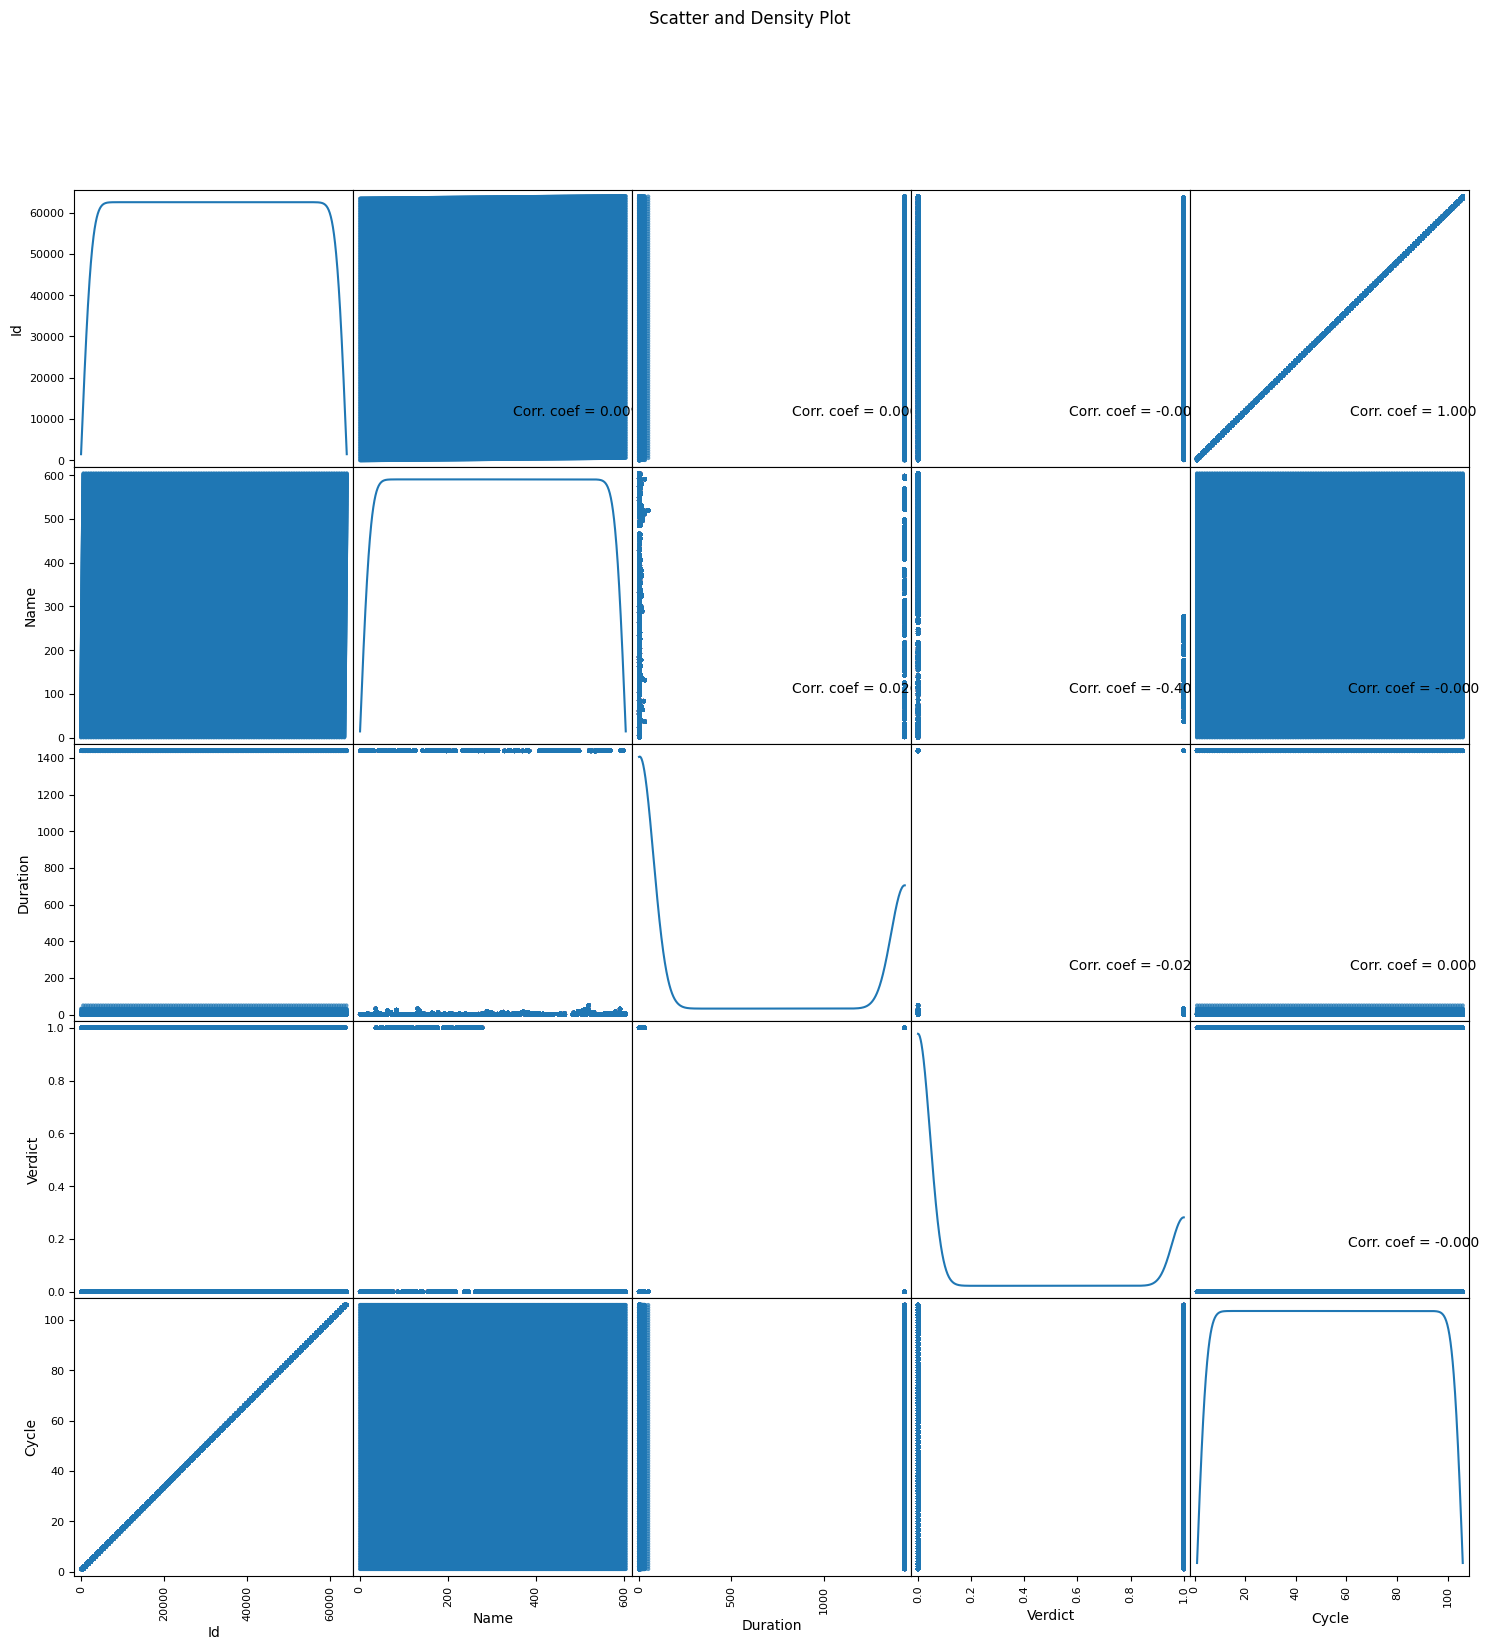

In [77]:
import numpy as np
def plot_scatter_matrix(data_df, plot_size, text_size):
    """Plot Scatter Matrix for the dataset and density plot for each column

    :param data_df: Dataset to plot
    :param plot_size: Plot size
    :param text_size: Text size
    """
    # scatter_matrix = pd.plotting.scatter_matrix(data_df, alpha=0.3, figsize=plot_size, diagonal='kde')
    # corrs = data_df.corr().values
    # for i, j in zip(*plt.np.triu_indices_from(scatter_matrix, k = 1)):
    #     scatter_matrix[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    # plt.suptitle('Scatter and Density Plot')
    # plt.show()
    data_df = data_df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data_df = data_df.dropna()
    # data_df = data_df.dropna('columns')
    data_df = data_df[[col for col in data_df if data_df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data_df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data_df = data_df[columnNames]
    ax = pd.plotting.scatter_matrix(data_df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = data_df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plot_scatter_matrix(data_df, 18, 10)